# Cardio_train EDA

Features:

Age | Objective Feature | age | int (days)  
Height | Objective Feature | height | int (cm) |  
Weight | Objective Feature | weight | float (kg) |  
Gender | Objective Feature | gender | categorical code 1 = women, 2 = men |  
Systolic blood pressure | Examination Feature | ap_hi | int |  
Diastolic blood pressure | Examination Feature | ap_lo | int |  
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
Smoking | Subjective Feature | smoke | binary |  
Alcohol intake | Subjective Feature | alco | binary |  
Physical activity | Subjective Feature | active | binary |  
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("../Data/cardio_train.csv", sep=";")
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


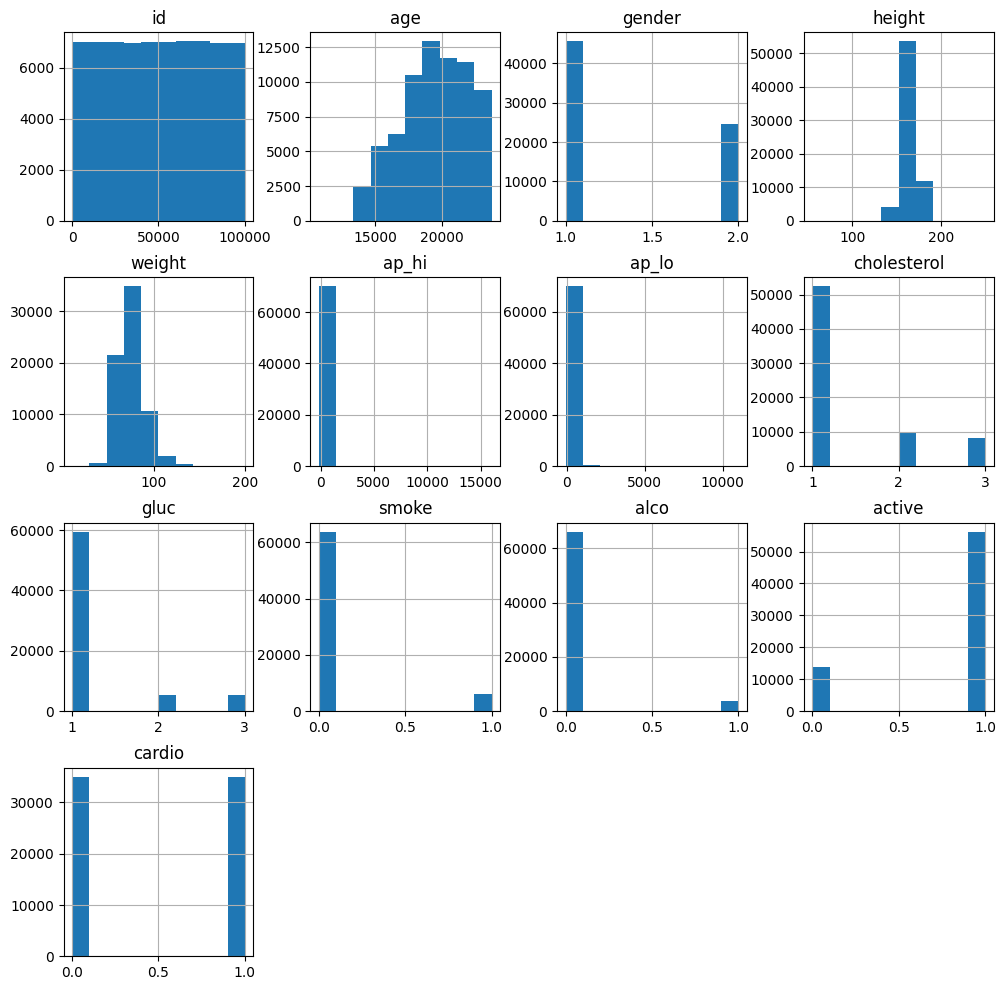

In [4]:
df.hist(figsize=(12, 12));

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [5]:
df.cardio.value_counts()

# 35021 negative
# 34979 positive

0    35021
1    34979
Name: cardio, dtype: int64

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

Text(0.5, 1.0, 'Amount of people with high cholesterol')

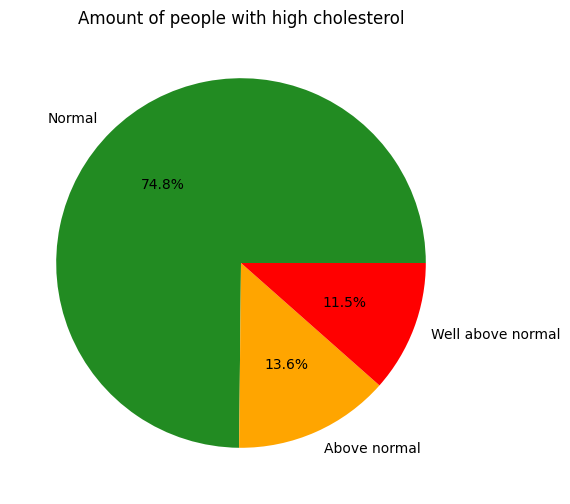

In [6]:
fig = plt.figure(figsize=(6, 6))
plt.pie(
    df["cholesterol"].value_counts(),
    labels=["Normal", "Above normal", "Well above normal"],
    autopct="%1.1f%%",
    colors=["forestgreen", "orange", "red"],
)
plt.title("Amount of people with high cholesterol", loc="center")


c) Hur ser åldersfördelningen ut? Rita ett histogram.

In [7]:
df["age_years"] = df["age"]/365

<Axes: xlabel='age_years', ylabel='Count'>

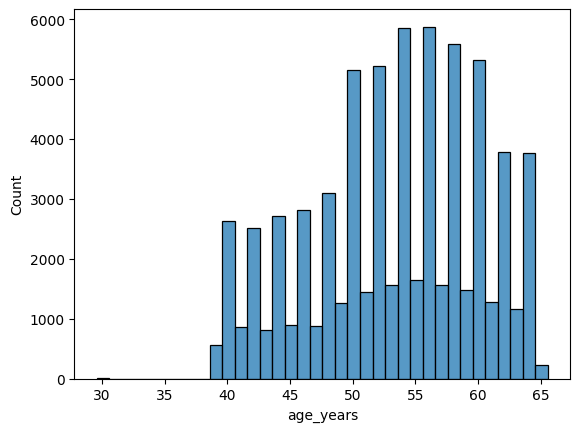

In [8]:
sns.histplot(df, x="age_years", binwidth=1)

# Mycket vanligare med jämn ålder än udda. Sannolikt för att man blir kallad på hälsokontroll vid en väldigt specifik ålder.

<Axes: xlabel='age_years', ylabel='Count'>

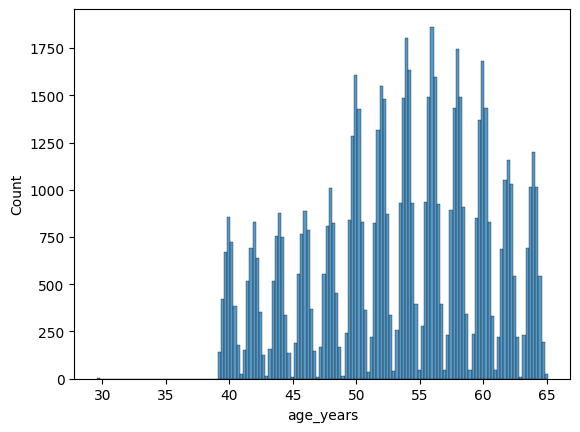

In [9]:
sns.histplot(df, x="age_years", binwidth=0.25)

# med fler bins ser vi ett ännu tydligare mönster där vissa åldrar är mycket vanligare än andra.

d) Hur stor andel röker?

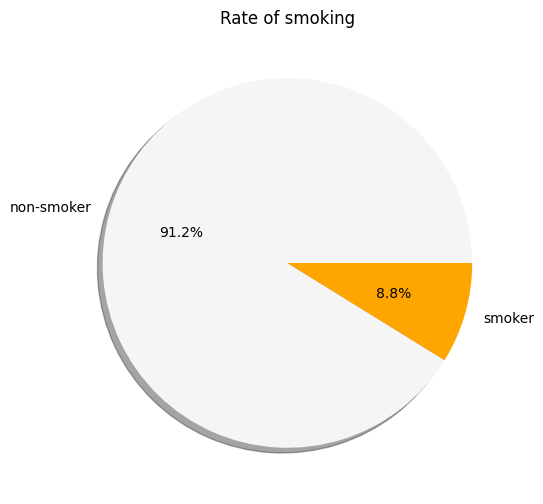

In [10]:
fig = plt.figure(figsize=(6, 6))
plt.pie(
    df["smoke"].value_counts(),
    labels=["non-smoker", "smoker"],
    autopct="%1.1f%%",
    colors=["whitesmoke", "orange"],
    shadow=True
)
plt.title("Rate of smoking", loc="center");

e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

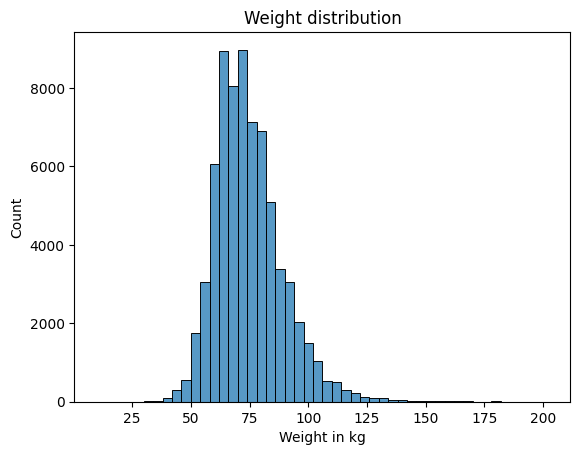

In [11]:
sns.histplot(df, x="weight", binwidth=4)
plt.title("Weight distribution")
plt.xlabel("Weight in kg");

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

Text(0.5, 0, 'Height in cm')

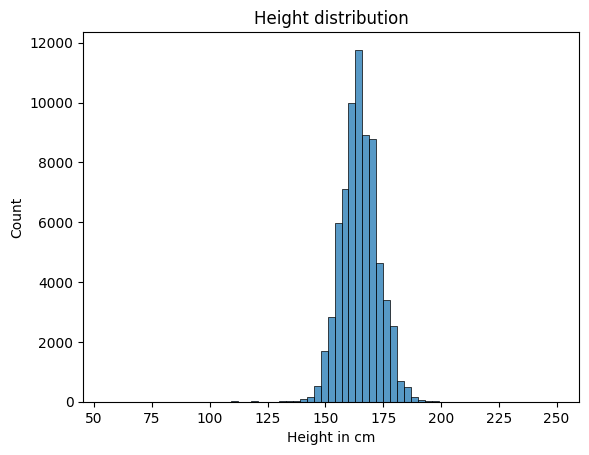

In [12]:
sns.histplot(df, x="height", binwidth=3)
plt.title("Height distribution")
plt.xlabel("Height in cm")

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

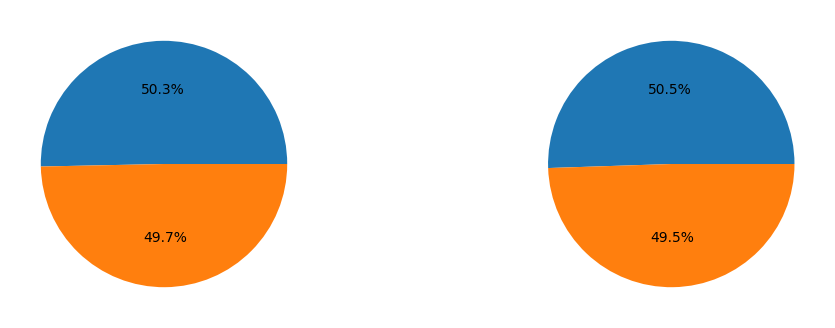

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, ax in enumerate(axes, 1):
    ax.pie(df[df["gender"] == i]["cardio"].value_counts(), autopct="%1.1f%%")


In [16]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [21]:
df.sort_values("cardio")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
38926,55576,19950,1,162,66.0,110,60,1,1,0,0,1,0,54.657534
38928,55578,20386,1,169,72.0,120,80,1,1,0,0,1,0,55.852055
38929,55580,18306,1,150,73.0,120,80,2,2,0,0,1,0,50.153425
38935,55589,18262,1,164,81.0,120,80,3,3,0,0,1,0,50.032877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450,20649,23474,1,167,64.0,160,90,2,1,0,0,1,1,64.312329
41045,58663,22019,1,158,73.0,130,89,3,1,0,0,1,1,60.326027
41046,58664,18260,1,160,83.0,140,70,3,1,0,0,1,1,50.027397
14453,20654,19765,2,170,74.0,12,80,1,1,0,0,1,1,54.150685


In [20]:
df[df["gender"] == 2]["cardio"].value_counts()

1    12363
0    12107
Name: cardio, dtype: int64